In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# tendencia - direção
# sazonalidade - recorrência das oscilações
# resíduo - o que sobra do sinal

In [3]:
df_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"

In [51]:
df = pd.read_csv(df_path, parse_dates=['DATE'], index_col='DATE')

df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [53]:
# 1) fazer os casts para os formatos corretos
# 2) fazer com que a data seja o index

#df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")


In [7]:
df.head()

,DATE,Value
DATE,,
1985-01-01,01-01-1985,72.5052
1985-02-01,02-01-1985,70.6720
1985-03-01,03-01-1985,62.4502
1985-04-01,04-01-1985,57.4714
1985-05-01,05-01-1985,55.3151


In [54]:
#df.drop("DATE", inplace=True, axis=1)

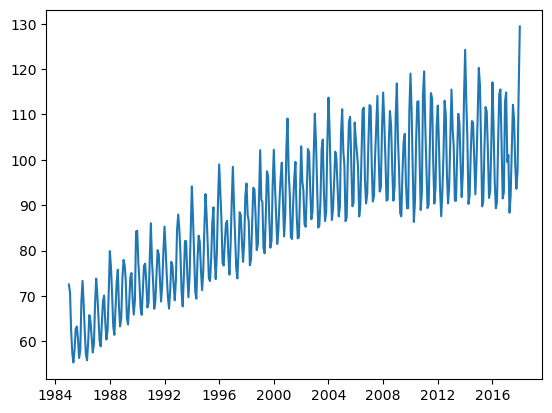

In [10]:
plt.plot(df.index, df.Value)

In [11]:
resultados = seasonal_decompose(df)

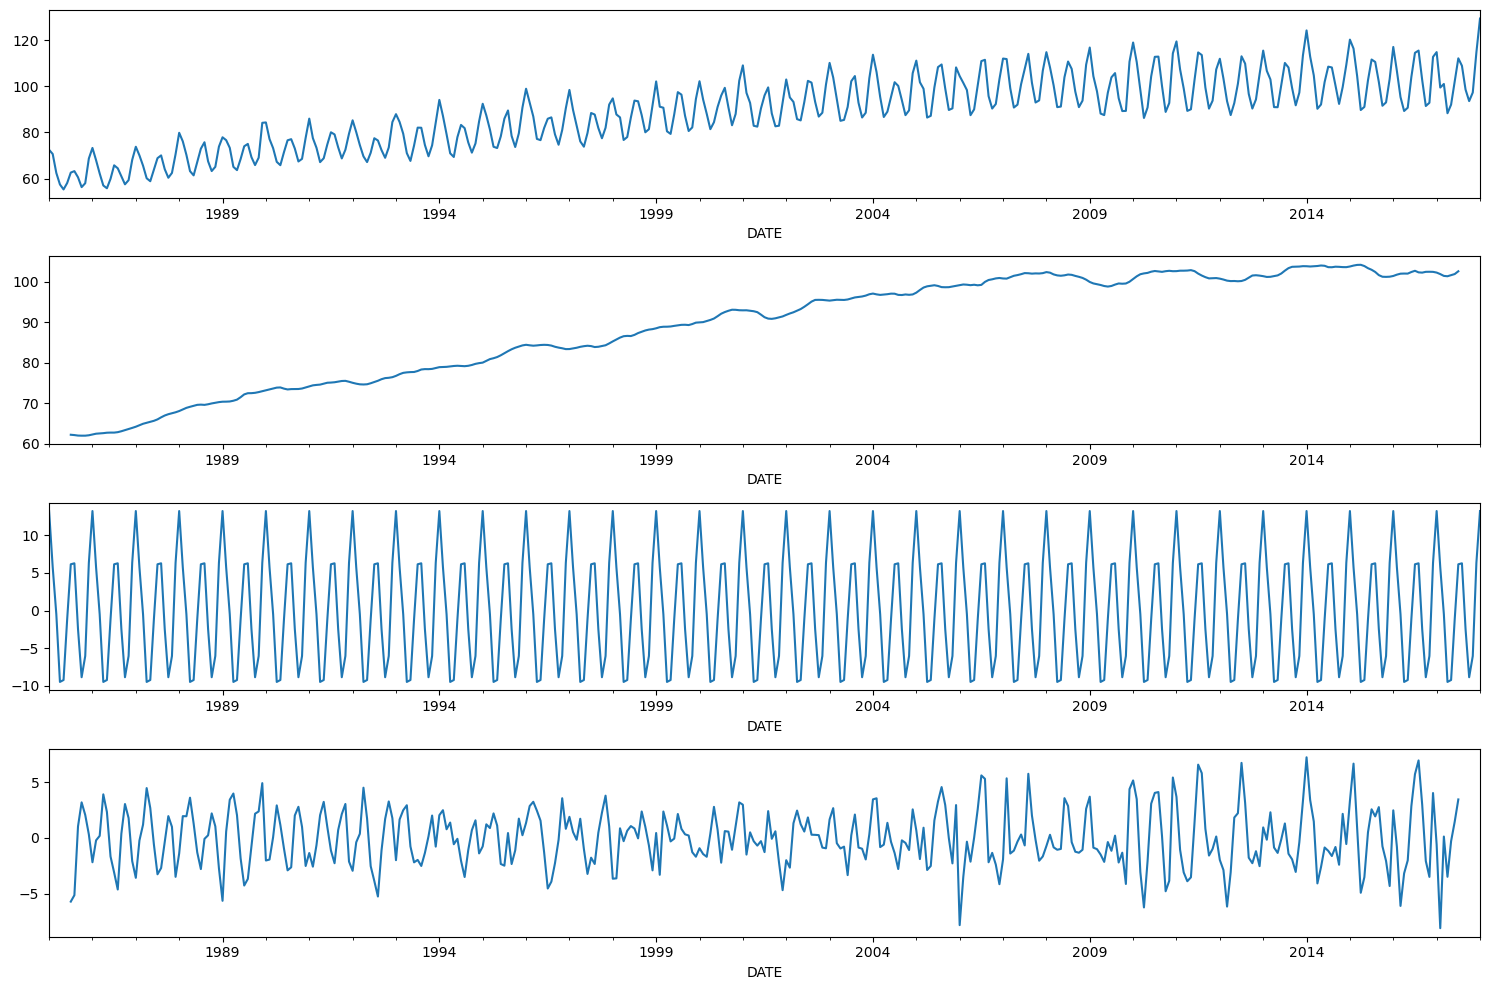

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,10))

# série
resultados.observed.plot(ax=ax1)
# tendência (crescente)
resultados.trend.plot(ax=ax2)
# sazonalidade
resultados.seasonal.plot(ax=ax3)
# resíduo
resultados.resid.plot(ax=ax4)

plt.tight_layout()
 

In [14]:
# Estacionária ou não estacionária

# ADF - Augmented Dickey-Fuller

# H0 - Hipótese Nula (a série temporal não é estacionária)
# H1 - Hipótese Alternativa (rejeição da hipótese nula, ou seja, a série temporal é estacionária)

# Quanto menor o p valor, mais evidências contra a hipótese nula nós temos
# p-value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
sns.set_style('darkgrid')

In [20]:
X = df.Value.values

In [27]:
# 3) verificar se a série é ou não estacionária
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-value: {result[1]}")
print("Valores Críticos")

for key, value in result[4].items():
    print(f"\t{key}: {value}")


Teste ADF
Teste Estatístico: -2.2569903500472455
P-value: 0.18621469116586759
Valores Críticos
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


In [29]:
# 4) transformar a série não estacionária em estacionária
#  transformação logarítmica e subtração da média móvel

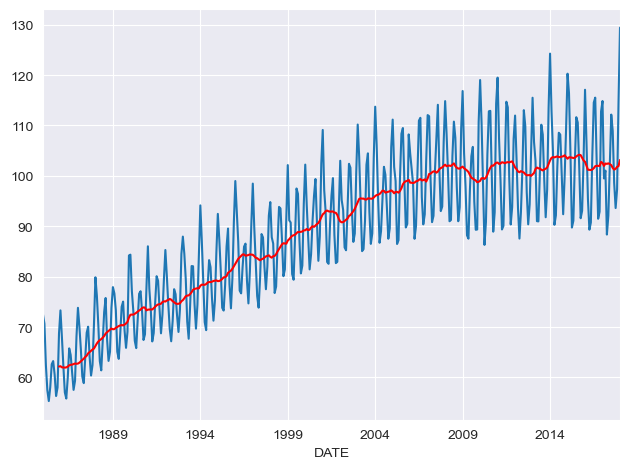

In [34]:
ma = df.rolling(12).mean()

fig, ax = plt.subplots()
df.plot(ax = ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')

plt.tight_layout()

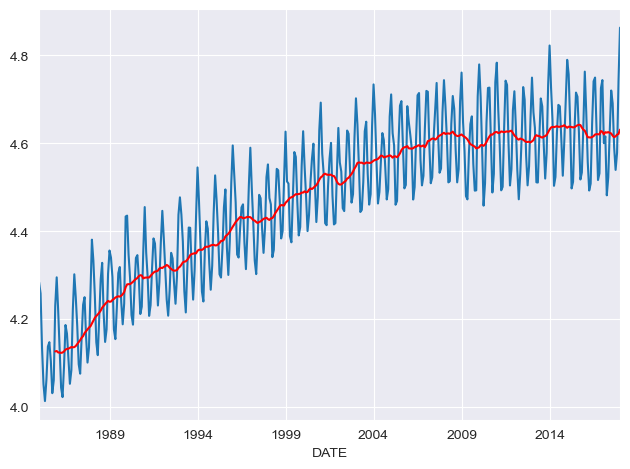

In [35]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

fig, ax = plt.subplots()
df_log.plot(ax = ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')

plt.tight_layout()

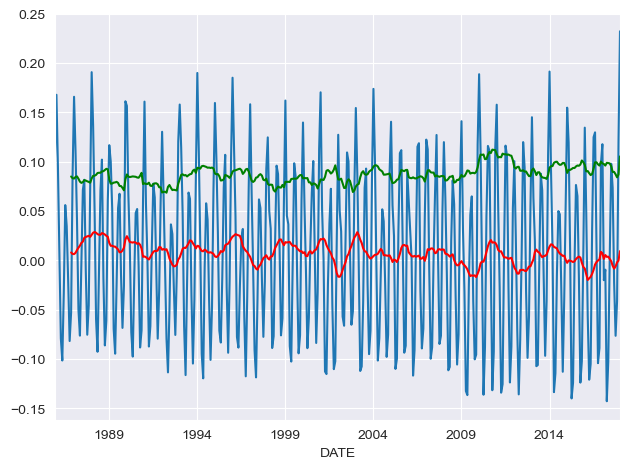

In [45]:
df_s = (df_log - ma_log).dropna()
ma_s = df_s.rolling(12).mean()
std = df_s.rolling(12).std()

fig, ax = plt.subplots()
df_s.plot(ax = ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')

plt.tight_layout()


In [47]:
X_s = df_s.Value.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-value: {result_s[1]}")
print("Valores Críticos")

for key, value in result_s[4].items():
    print(f"\t{key}: {value}")


Teste ADF
Teste Estatístico: -5.211586185365455
P-value: 8.325639759945464e-06
Valores Críticos
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


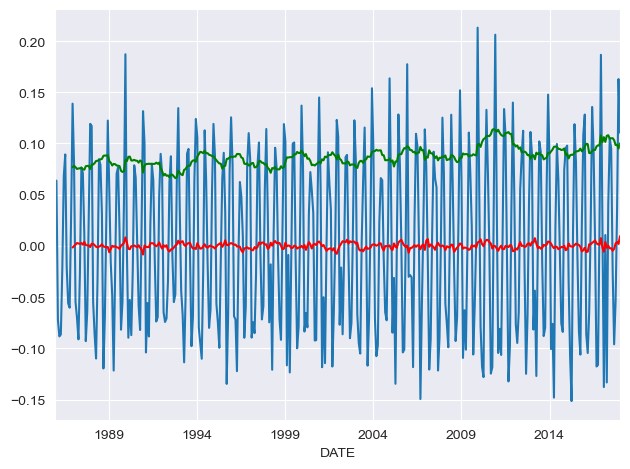

In [48]:
# a derivada de uma função de primeiro grau é um número

df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

fig, ax = plt.subplots()
df_diff.plot(ax = ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')

plt.tight_layout()



In [50]:
X_diff = df_diff.Value.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-value: {result_diff[1]}")
print("Valores Críticos")

for key, value in result_diff[4].items():
    print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -7.651129568145219
P-value: 1.788126735435266e-11
Valores Críticos
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269
